> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# Lab 11: Linear Regression for HR

In this lab, we’ll use the merged HR dataset to build a **linear regression model** to predict the number of years that an employee will work for the company (job tenure).

### Problem Statement
A large company employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this employee turnover is bad for the company, because of the following reasons -

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to increase the number of years that employees stay with the company. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

### Goal of the case study
You are required to model the number of years employees work for the company using a llinear regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


### Analytics Objectives:
1. Load and explore the dataset
2. Clean and prepare features
3. Encode categorical variables
4. Split the data into training and test sets
5. Train and evaluate a linear regression model
6. Reflect on variable importance and model fit

**Target Variable:** `YearsAtCompany`


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_11_regression.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

**Dataset:** `merged_hr_data.csv`  
Source: [Kaggle HR Analytics Case Study](https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study)

| Variable                      | Type        | Description |
|-------------------------------|-------------|-------------|
| `Age`                         | Numeric     | Age of the employee |
| `Attrition`                   | Categorical | Whether the employee has left the company (Yes/No) |
| `BusinessTravel`              | Categorical | Frequency of business travel |
| `Department`                  | Categorical | Department name |
| `DistanceFromHome`           | Numeric     | Distance from home to work (in km) |
| `Education`                  | Ordinal     | Employee education level (1–5) |
| `EducationField`             | Categorical | Field of education |
| `EmployeeID`                 | Identifier  | Unique identifier for employee |
| `EmployeeCount`              | Constant    | Always 1 (not useful for modeling) |
| `EnvironmentSatisfaction`    | Ordinal     | Satisfaction with the environment (1–4) |
| `Gender`                     | Categorical | Gender of the employee |
| `JobInvolvement`             | Ordinal     | Level of involvement with job (1–4) |
| `JobLevel`                   | Ordinal     | Employee level (1–5) |
| `JobRole`                    | Categorical | Job title |
| `JobSatisfaction`            | Ordinal     | Satisfaction with the job (1–4) |
| `MaritalStatus`              | Categorical | Marital status |
| `MonthlyIncome`              | Numeric     | Monthly salary in USD |
| `NumCompaniesWorked`         | Numeric     | Number of companies previously worked for |
| `Over18`                     | Constant    | Always "Y" (not useful) |
| `PercentSalaryHike`          | Numeric     | Percentage salary increase |
| `PerformanceRating`          | Ordinal     | Performance rating (1–4) |
| `StandardHours`              | Constant    | Always 80 (not useful) |
| `StockOptionLevel`           | Ordinal     | Stock options level (0–3) |
| `TotalWorkingYears`          | Numeric     | Total years of professional experience |
| `TrainingTimesLastYear`      | Numeric     | Number of training sessions attended last year |
| `WorkLifeBalance`            | Ordinal     | Work-life balance rating (1–4) |
| `YearsAtCompany`             | Numeric     | Years spent at the current company |
| `YearsInCurrentRole`         | Numeric     | Years spent in current role |
| `YearsSinceLastPromotion`    | Numeric     | Years since last promotion |
| `YearsWithCurrManager`       | Numeric     | Years with current manager |
| `JobSatisfaction`            | Ordinal     | Self-reported job satisfaction (1–4) |
| `EnvironmentSatisfaction`    | Ordinal     | Satisfaction with the work environment (1–4) |
| `WorkLifeBalance`            | Ordinal     | Work-life balance rating (1–4) |
| `JobInvolvement`             | Ordinal     | Employee’s job involvement level (1–4) |
| `PerformanceRating`          | Ordinal     | Most recent performance rating |



## Part 1: Load data and packages




In [1]:
import pandas as pd

# Load the merged HR dataset
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/merged_hr_data.csv"
df = pd.read_csv(url)

# Preview structure
print("Shape:", df.shape)
df.head()


Shape: (4410, 29)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## Part 2: Data Cleaning

Real-world HR data often contains administrative fields (e.g., ID numbers), constants (same value for all rows), or missing values.

### What We’re Doing:
- Remove irrelevant or constant columns: `EmployeeCount`, `Over18`, `StandardHours`, `EmployeeID`
- Drop rows with missing data

### Why It Matters:
- Non-informative or redundant features can reduce model accuracy and interpretability.
- Regression does not handle missing values natively, so we need a clean dataset.
- Dropping some rows is reasonable here due to the relatively small number of nulls.

> Ethical Note: In practice, dropping rows may disproportionately exclude certain groups—so this step should be handled with caution.


In [2]:
# Drop unnecessary columns
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID', 'Attrition']
df.drop(columns=drop_cols, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Check result
print("After cleaning:", df.shape)


After cleaning: (4300, 24)


## Part 3: Encode Categorical Variables

Machine learning algorithms like linear regression require **numeric inputs**. To use categorical data like `Gender` or `JobRole`, we convert them into **dummy variables** using one-hot encoding.

### Key Steps:
- Use `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity

### Why It Matters:
- Ensures model can interpret categorical inputs numerically
- Dropping the first dummy prevents the "dummy variable trap" where one variable is a linear combination of others
- Accurate encoding helps ensure model fairness and interpretability

> Reminder: Avoid encoding identifiers or columns with too many unique levels without reduction.



In [3]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview encoded columns
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   int64  
 1   DistanceFromHome                   4300 non-null   int64  
 2   Education                          4300 non-null   int64  
 3   JobLevel                           4300 non-null   int64  
 4   MonthlyIncome                      4300 non-null   int64  
 5   NumCompaniesWorked                 4300 non-null   float64
 6   PercentSalaryHike                  4300 non-null   int64  
 7   StockOptionLevel                   4300 non-null   int64  
 8   TotalWorkingYears                  4300 non-null   float64
 9   TrainingTimesLastYear              4300 non-null   int64  
 10  YearsAtCompany                     4300 non-null   int64  
 11  YearsSinceLastPromotion            4300 non-null   int64  
 1

### 🔧 Try It Yourself - Part 3

1. How many new columns were created during one-hot encoding?  
2. Why is it important to avoid including columns like `EmployeeID` in modeling?
3. Our model is trying to predict employment longevity.  Why is `Attrition` problematic for predicting years at the company?

Write a few sentences on each of the questions above. No coding is required here.


🔧 Add comment here:
1. 14 columns were created. There were 29 before, 24 after columns were dropped, and now there are 38.
2. Because it can mess up the model despite it being just an identifier. It doesn't actually factor into the target variable, so it just serves as clutter.
3. Because it doesn't matter whether they left or not, it just clutters the model. We are trying to predict the time they were here in years, so a variable saying that they left isn't relevant.

### Part 4: Standardizing Features for Regression

When using models like **linear regression**, it's highly recommended to ensure all numeric features are on a similar scale. This helps the model converge more reliably and prevents features with larger magnitudes from dominating the learning process.

In this step, we'll use `StandardScaler` from `sklearn` to scale all feature columns to have a mean of 0 and a standard deviation of 1.

This is especially important your dataset includes variables with vastly different units or scales (e.g., "Age" vs. "MonthlyIncome")

> **Note:** The target variable (`YearsAtCompany`) should **not** be scaled — only the input features.

---


In [4]:
from sklearn.preprocessing import StandardScaler

# Separate the features and the target
X = df_encoded.drop(columns=['YearsAtCompany'])
y = df_encoded['YearsAtCompany']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reconstruct scaled DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Preview the scaled features
X.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.538800,-0.394993,-0.891282,-0.964277,1.405193,-0.677226,-1.149725,-0.931939,-1.320442,2.483520,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668,1.088049,-0.688195
1,-0.648079,0.099071,-1.867220,-0.964277,-0.492557,-1.077952,2.126858,0.239797,-0.678523,0.157924,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668,-0.919077,1.453077
2,-0.538735,0.963683,1.060595,1.746964,2.725773,-0.677226,-0.057531,2.583269,-0.806907,-0.617274,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668,1.088049,-0.688195
3,0.117329,-0.889057,2.036534,0.843217,0.385846,0.124225,-1.149725,2.583269,0.220163,1.708321,...,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668,1.088049,-0.688195
4,-0.538735,0.099071,-1.867220,-0.964277,-0.885202,0.524950,-0.876677,1.411533,-0.293372,-0.617274,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668,-0.919077,1.453077


### 🔧 Try It Yourself - Part 4

You've now scaled your features using `StandardScaler`, which makes each feature have a mean of 0 and a standard deviation of 1.

**Think about this:**
Suppose we didn't standardize the features and trained a regression model using raw input data instead. What might happen to the interpretation or relative importance of the coefficients?

**Write one or two sentences** explaining how not standardizing the data could affect the model's performance or interpretability.


🔧 Add comment here: Not standardizing the data could skew the data and the model's performance. It can put more importance on variables that don't have that much of an effect.

## Part 5: Train-Test Split

We'll split the dataset into:
- 80% for training
- 20% for testing

To preserve class proportions, we **stratify on our target variable**. This ensures fair evaluation.

> This step helps avoid training/test imbalance especially in classification tasks.



In [5]:
from sklearn.model_selection import train_test_split

# Use already standardized features in X, and original target y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check the shapes of the splits
X_train.shape, X_test.shape



((3440, 37), (860, 37))

### 🔧 Try It Yourself - Part 5

1. In the code cell below, calculate what average `YearsAtCompany` for all employees

### In Your Response:
1. Answer the following question in the markdown cell: Why is stratified sampling especially important for classification?


In [6]:
# 🔧 Add code here
Years = df['YearsAtCompany']
Years.mean()

np.float64(7.026046511627907)

### ✍️ Your Response: 🔧
1. Stratified sampling is important for classification because it allows for focused modeling.

## Part 6: Train the Regression

Now we fit a linear regression model using the training data.  

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Display coefficients in order of highest to lowest correlation
coefficients_linear = pd.Series(linear_model.coef_, index=X.columns)
print("\nLinear Regression Coefficients (ordered):")
print(coefficients_linear.sort_values(ascending=False))



Linear Regression Coefficients (ordered):
YearsWithCurrManager                 2.870782
TotalWorkingYears                    2.457193
YearsSinceLastPromotion              1.375845
JobRole_Manager                      0.195138
PercentSalaryHike                    0.123066
Department_Research & Development    0.109899
EducationField_Other                 0.097290
DistanceFromHome                     0.083271
Department_Sales                     0.074728
JobRole_Research Director            0.068396
JobRole_Human Resources              0.068217
JobSatisfaction                      0.062943
TrainingTimesLastYear                0.048558
JobRole_Manufacturing Director       0.027006
EducationField_Marketing             0.016536
WorkLifeBalance                      0.015945
StockOptionLevel                     0.014536
BusinessTravel_Travel_Frequently     0.012125
JobInvolvement                       0.008352
EnvironmentSatisfaction              0.006789
JobRole_Sales Executive             -

### 🔧 Try It Yourself - Part 6

1. Which features are most positively associated with high job tenure (years at company)?
2. Which features are most negatively associated with staying?

### In Your Response:
Write a few sentences on each of the questions above. No coding is required here.

### ✍️ Your Response: 🔧
1. YearsWithCurrManager, TotalWorkingYears, and YearsSinceLastPromotion are positively associated with high job tenure. They have a positive integer of correlation.
2. EducationField_Medicalm, Age, and NumCompaniesWorked are most negatively associated with stating. They have a negative integer.

## Part 7: Evaluate Model Performance

Let’s test how well our model generalizes to unseen data. We'll compute:
- Mean Squared Error (MSE)
- R-Squared

In [8]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 9.88
R-squared (R2): 0.75


Now visualize the model output

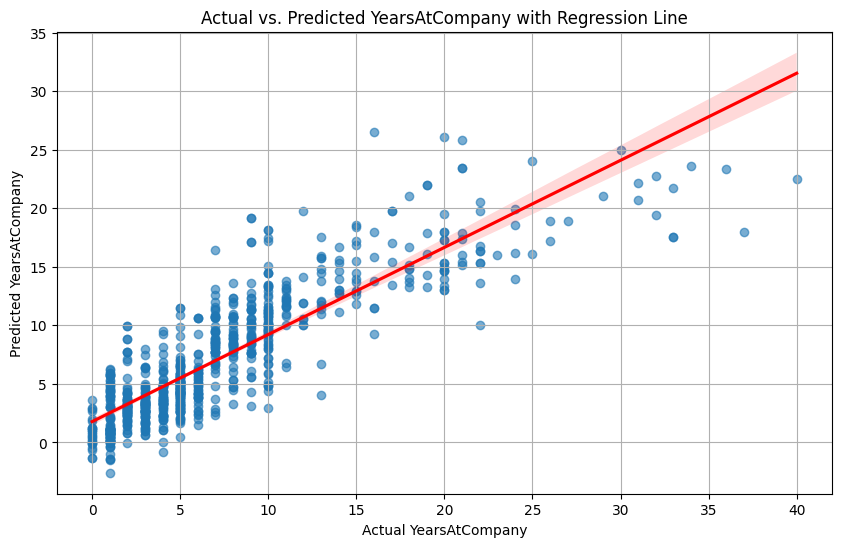

R-squared (R2) for Reduced Model: 0.75


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of predicted vs actual YearsAtCompany
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
ax.set_xlabel("Actual YearsAtCompany")
ax.set_ylabel("Predicted YearsAtCompany")
plt.title("Actual vs. Predicted YearsAtCompany with Regression Line")
plt.grid(True)
plt.show()
print(f"R-squared (R2) for Reduced Model: {r2:.2f}")

### 🔧 Try It Yourself - Part 7

1. Is this R-squared fit good?
2. How could we improve the fit?

### ✍️ Your Response: 🔧
1. Yes.
2. We could improve it by finding the p values of the x variables and then removing the insignificant variables.

## Part 8: Feature Selection for Accuracy Improvement

Not all features equally influence `YearsAtCompany`. By identifying and using only the most important predictors, we can:
- Simplify the model
- Potentially improve performance or interpretability
- Reduce overfitting

We’ll use the linear regression model’s coefficients to rank feature importance.


In [10]:
# Get top 10 features based on absolute coefficient magnitude
top_features = coefficients_linear.abs().sort_values(ascending=False).head(10)

# Print the top features and their weights
top_features

,0
YearsWithCurrManager,2.870782
TotalWorkingYears,2.457193
YearsSinceLastPromotion,1.375845
NumCompaniesWorked,0.850042
Age,0.375170
EducationField_Medical,0.198196
JobRole_Manager,0.195138
MonthlyIncome,0.132967
PercentSalaryHike,0.123066
JobLevel,0.114917


### 🔧 Try It Yourself – Part 8

1. Create a new training and test set using only the 10 most important features.
2. Retrain the linear regression model on this reduced dataset.
3. Evaluate performance of the new version


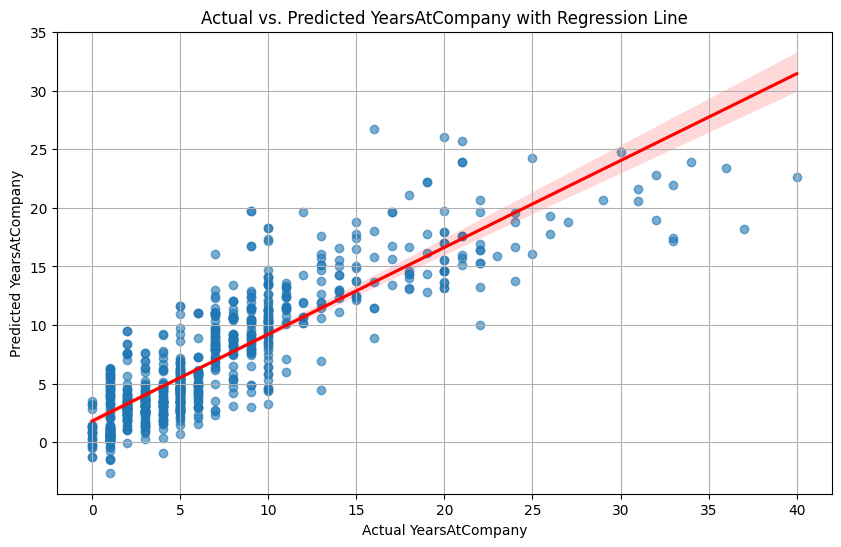

Mean Squared Error (MSE) for Reduced Model: 9.93
R-squared (R2) Model: 0.74


In [13]:
# 🔧 Step 1: Identify the top 10 most important features using absolute value of regression coefficients
top_features

# 🔧 Step 2: Create new versions of X_train and X_test with only those top features
X_train_reduced = X_train[top_features.index]
X_test_reduced = X_test[top_features.index]

# 🔧 Step 3: Initialize and fit a new Regression model on the reduced feature set
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, y_train)

# 🔧 Step 4: Use the new model to predict on the test set
y_prediction_linear_reduced = linear_model_reduced.predict(X_test_reduced)

# 🔧 Step 5: Create a chart to visualize the new model
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=y_test, y=y_prediction_linear_reduced, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
ax.set_xlabel("Actual YearsAtCompany")
ax.set_ylabel("Predicted YearsAtCompany")
plt.title("Actual vs. Predicted YearsAtCompany with Regression Line")
plt.grid(True)
plt.show()

# 🔧 Step 6: Evaluate the reduced model using R-squared
mse_reduced = mean_squared_error(y_test, y_prediction_linear_reduced)
r2_reduced = r2_score(y_test, y_prediction_linear_reduced)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE) for Reduced Model: {mse_reduced:.2f}")
print(f"R-squared (R2) Model: {r2_reduced:.2f}")

## 🔧 Part 9: Reflection

1. How did the reduced-feature model compare to the full model?
2. Would this version be easier to explain or use in an HR meeting?

### In Your Response:
1. Write a few sentences on each of the questions above. No coding is required here.

### ✍️ Your Response: 🔧
1. The reduced-feature model did worse. It has a R2 value of 0.74, compared to the R2 value of 0.75.
2. This version would be easier to explain. This is because it has less features to explain.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [14]:
!jupyter nbconvert --to html "lab_11_AndradeLeslie.ipynb"

[NbConvertApp] Converting notebook lab_11_AndradeLeslie.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 556882 bytes to lab_11_AndradeLeslie.html
